In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import pearsonr


In [15]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [16]:
df = pd.read_csv('./data/data_set/맛집 데이터 3.5 이상.csv')

In [17]:
df = df.drop('Unnamed: 0', axis=1)
df

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000


In [18]:
pop_2022 = pd.read_csv('./data/data_set/2022인구수.csv')
pop_2022 = pop_2022.drop('Unnamed: 0', axis=1)
pop_2022

,구,총 인구수,남자 인구수,여자 인구수
0,종로구,"140,389","67,928","72,461"
1,중구,"119,402","57,975","61,427"
2,용산구,"216,005","103,947","112,058"
3,성동구,"280,295","136,351","143,944"
4,광진구,"336,339","162,081","174,258"
5,동대문구,"333,759","164,366","169,393"
6,중랑구,"384,950","189,325","195,625"
7,성북구,"429,175","206,542","222,633"
8,강북구,"293,211","142,404","150,807"
9,도봉구,"311,833","151,470","160,363"


In [19]:
pop_2022 = pop_2022.set_index('구')
pop_2022.head()

,총 인구수,남자 인구수,여자 인구수
구,,,
종로구,"140,389","67,928","72,461"
중구,"119,402","57,975","61,427"
용산구,"216,005","103,947","112,058"
성동구,"280,295","136,351","143,944"
광진구,"336,339","162,081","174,258"


In [23]:
li = []
for i in range(0,25) :
    pop_2022['총 인구수'][i] = pop_2022['총 인구수'][i].replace(',','')
    pop_2022['남자 인구수'][i] = pop_2022['남자 인구수'][i].replace(',','')
    pop_2022['여자 인구수'][i] = pop_2022['여자 인구수'][i].replace(',','')

pop_2022.head()

,총 인구수,남자 인구수,여자 인구수
구,,,
종로구,140389,67928,72461
중구,119402,57975,61427
용산구,216005,103947,112058
성동구,280295,136351,143944
광진구,336339,162081,174258


In [24]:
pop_2022.dtypes 

총 인구수     object
남자 인구수    object
여자 인구수    object
dtype: object

In [26]:
pop_2022 = pop_2022.astype('int')   

In [27]:
pop_2022.dtypes 

총 인구수     int32
남자 인구수    int32
여자 인구수    int32
dtype: object

In [28]:
pop_num = pop_2022['총 인구수']
pop_num

구
종로구     140389
중구      119402
용산구     216005
성동구     280295
광진구     336339
동대문구    333759
중랑구     384950
성북구     429175
강북구     293211
도봉구     311833
노원구     503798
은평구     468176
서대문구    301728
마포구     362552
양천구     440549
강서구     568286
구로구     391812
금천구     229414
영등포구    372472
동작구     381787
관악구     482450
서초구     401084
강남구     522874
송파구     656576
강동구     457466
Name: 총 인구수, dtype: int32

In [29]:
num = df['구'].value_counts()
num

강남구     81
마포구     73
용산구     71
종로구     66
서초구     65
송파구     50
성동구     49
중구      46
서대문구    45
영등포구    38
관악구     27
성북구     25
광진구     22
동작구     21
동대문구    18
강동구     15
강서구     13
은평구     10
도봉구     10
노원구      6
구로구      6
강북구      5
양천구      4
중랑구      3
금천구      2
Name: 구, dtype: int64

In [30]:
test = pd.DataFrame(pop_num)
test.head()

,총 인구수
구,
종로구,140389
중구,119402
용산구,216005
성동구,280295
광진구,336339


In [31]:
test1 = pd.DataFrame(num)
test1.head()

,구
강남구,81
마포구,73
용산구,71
종로구,66
서초구,65


In [32]:
test2 = test1.rename(columns={'구': '구별맛집수'})
test2['구'] = test2.index
test2.set_index('구',inplace=True)
test2.head()

,구별맛집수
구,
강남구,81
마포구,73
용산구,71
종로구,66
서초구,65


In [33]:
test2.dtypes

구별맛집수    int64
dtype: object

In [34]:
li = []
for i in range(0,25) :
    a = test2.index[i].replace(' ','')
    li.append(a)
li
test2.index= li
test2.head()

,구별맛집수
강남구,81
마포구,73
용산구,71
종로구,66
서초구,65


In [35]:
Fin_df= test.merge(test2,left_index=True, right_index=True, how='outer')
Fin_df = Fin_df.reset_index()
Fin_df.rename(columns={'index':'구'},inplace=True)
Fin_df.head()

,구,총 인구수,구별맛집수
0,강남구,522874,81
1,강동구,457466,15
2,강북구,293211,5
3,강서구,568286,13
4,관악구,482450,27


In [38]:
Fin_df.to_csv('./data/data_set/구별 인구수와 맛집수.csv')

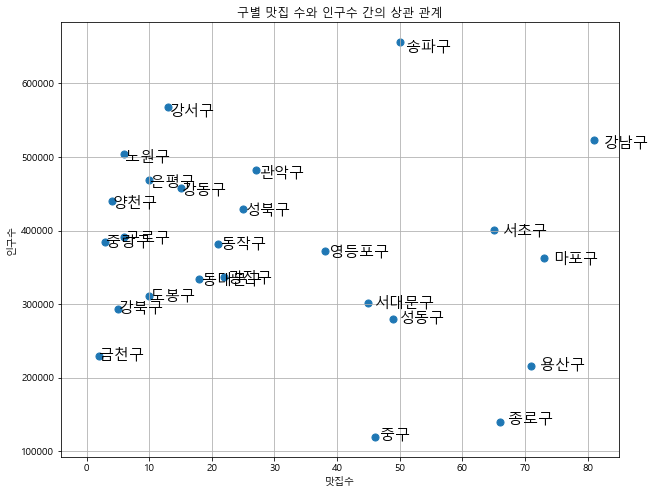

In [37]:
fp1 = np.polyfit(Fin_df['구별맛집수'], Fin_df['총 인구수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(0, 200, 1)

plt.figure(figsize=(10,8))
plt.scatter(Fin_df['구별맛집수'], Fin_df['총 인구수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(Fin_df['구별맛집수'][n]*1.02, Fin_df['총 인구수'][n]*0.98, 
             Fin_df.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 인구수 간의 상관 관계")   
plt.xlabel('맛집수')
plt.ylabel('인구수')
plt.grid()
plt.show()

In [ ]:
print(pearsonr(Fin_df['구별맛집수'], Fin_df['총 인구수']))